In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the directories for the training and validation datasets
train_dir = 'dataset/train'
val_dir = 'dataset/test'

In [3]:
# Set the parameters for the image preprocessing
img_width, img_height = 224, 224
batch_size = 32

In [4]:
# Create data generators to preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 7385 images belonging to 4 classes.


In [6]:
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 6267 images belonging to 4 classes.


In [7]:
# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
epochs = 50
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)

Epoch 1/50
231/231 [==============================] - 297s 1s/step - loss: 0.5137 - accuracy: 0.8133 - val_loss: 0.1159 - val_accuracy: 0.9582
Epoch 2/50
231/231 [==============================] - 227s 980ms/step - loss: 0.1232 - accuracy: 0.9591 - val_loss: 0.0212 - val_accuracy: 0.9935
Epoch 3/50
231/231 [==============================] - 278s 1s/step - loss: 0.0538 - accuracy: 0.9821 - val_loss: 0.0105 - val_accuracy: 0.9976
Epoch 4/50
231/231 [==============================] - 230s 997ms/step - loss: 0.0276 - accuracy: 0.9905 - val_loss: 0.0072 - val_accuracy: 0.9979
Epoch 5/50
231/231 [==============================] - 227s 980ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/50
231/231 [==============================] - 538s 2s/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 0.0036 - val_accuracy: 0.9986
Epoch 7/50
231/231 [==============================] - 247s 1s/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0033 - val_accurac

In [11]:
# Save the trained model
model.save('KDM.h5')

In [12]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [13]:
epochs_range = range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

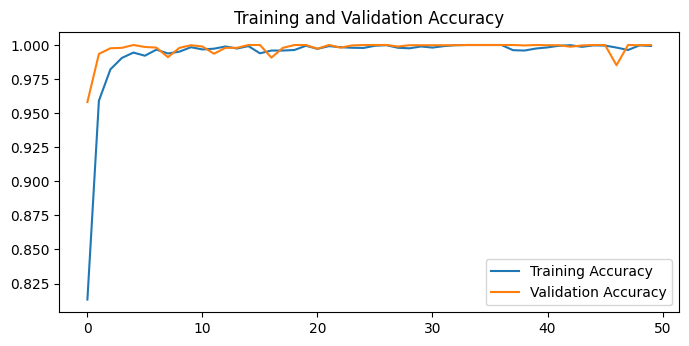

In [14]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

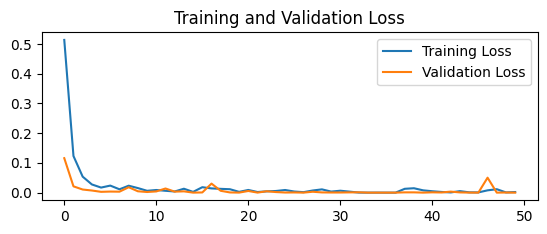

In [15]:
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

196/196 [==============================] - 34s 175ms/step


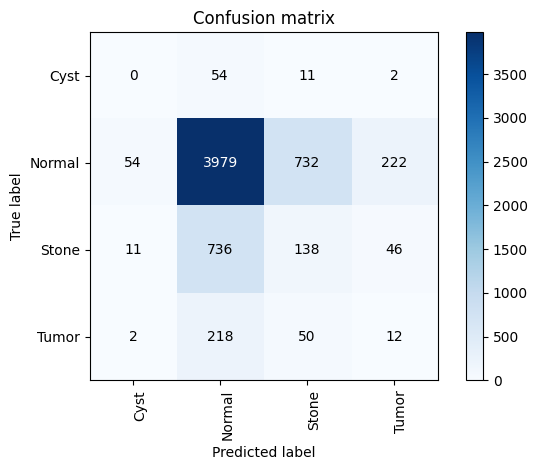

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# Generate predictions and compute the confusion matrix
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_generator.classes, y_pred)

# Define class labels
class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# Set the x-axis and y-axis labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label')
# Rotate the x-axis labels to vertical orientation
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
# Loop over the data and annotate each cell with its value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
# Add a title to the plot
ax.set_title("Confusion matrix")
fig.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import classification_report

# Generate predictions
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the class labels
class_labels = list(val_generator.class_indices.keys())

# Generate the classification report
report = classification_report(val_generator.classes, y_pred, target_names=class_labels)
print(report)


196/196 [==============================] - 37s 188ms/step
              precision    recall  f1-score   support

        Cyst       0.01      0.01      0.01        67
      Normal       0.79      0.79      0.79      4987
       Stone       0.13      0.13      0.13       931
       Tumor       0.01      0.01      0.01       282

    accuracy                           0.65      6267
   macro avg       0.24      0.24      0.24      6267
weighted avg       0.65      0.65      0.65      6267



In [19]:
# Evaluate the model on the validation data
_, accuracy = model.evaluate(val_generator)

# Print the validation accuracy
print('Validation Accuracy: %.2f' % (accuracy*100))


196/196 [==============================] - 34s 173ms/step - loss: 1.2792e-05 - accuracy: 1.0000
Validation Accuracy: 100.00


In [21]:
# Get the accuracy from the history object
accuracy = history.history['accuracy'][-1]

# Print the accuracy to the console
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.93%
